<a href="https://colab.research.google.com/github/xmuhammadaziz09/deeplearning-2.0/blob/main/Tugas2_deeplearning_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
DATA_DIR = '/content/drive/MyDrive/Dataset_parfum'
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [18]:
datagen = ImageDataGenerator(
    preprocessing_function=None,
    validation_split=0.2
)

train_flow = datagen.flow_from_directory(
    DATA_DIR,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_flow = datagen.flow_from_directory(
    DATA_DIR,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 974 images belonging to 4 classes.
Found 243 images belonging to 4 classes.


In [19]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze layer awal

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(len(train_flow.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [20]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
history = model.fit(
    train_flow,
    validation_data=val_flow,
    epochs=50
)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 277s 9s/step - accuracy: 0.2680 - loss: 1.7431 - val_accuracy: 0.2922 - val_loss: 1.4034
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2892 - loss: 1.5457 - val_accuracy: 0.3045 - val_loss: 1.3761
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.3814 - loss: 1.3408 - val_accuracy: 0.3580 - val_loss: 1.3346
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4219 - loss: 1.2776 - val_accuracy: 0.4156 - val_loss: 1.3126
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4667 - loss: 1.2256 - val_accuracy: 0.4280 - val_loss: 1.3087
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4701 - loss: 1.1774 - val_accuracy: 0.4403 - val_loss: 1.3008
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5328 - loss: 1.1181 - val_accuracy: 0.4198 - val_loss: 1.2961
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.5405 - loss: 1.0822 - val_accuracy: 0.4568 - val_loss

In [25]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')


39/39 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8030 - loss: 0.6510
Test accuracy: 84.47%


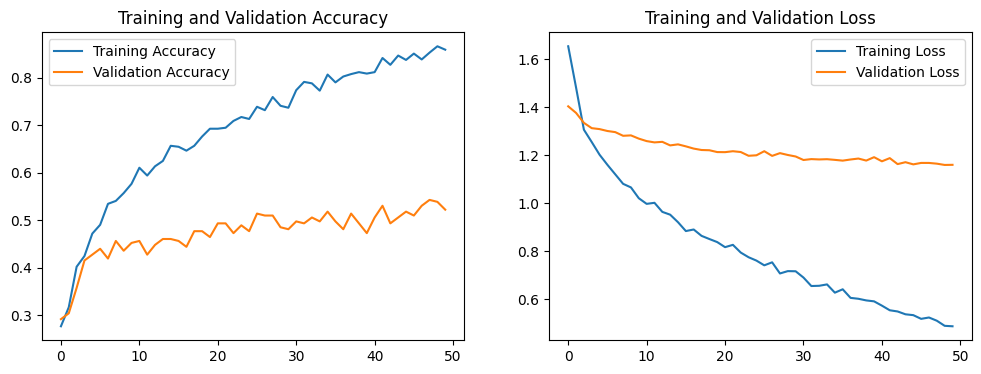

In [27]:
# Visualisasi hasil training dan testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Nama Kelas: ['Parfum botol plastik', 'Parfum roll', 'Parfum spray  logam', 'Rarfum kaca']
39/39 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step


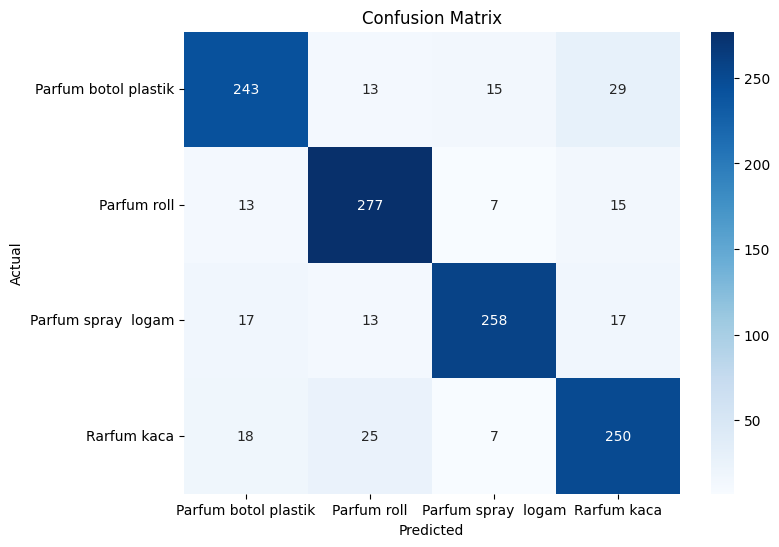

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dapatkan nama kelas dari train_flow
class_names = list(train_flow.class_indices.keys())
print("Nama Kelas:", class_names)

# Evaluasi model pada data test
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Matriks konfusi
conf_mat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Saving 0b4a4e57-ee83-40f4-9172-9efb7b328df6.jpg.jpg to 0b4a4e57-ee83-40f4-9172-9efb7b328df6.jpg.jpg


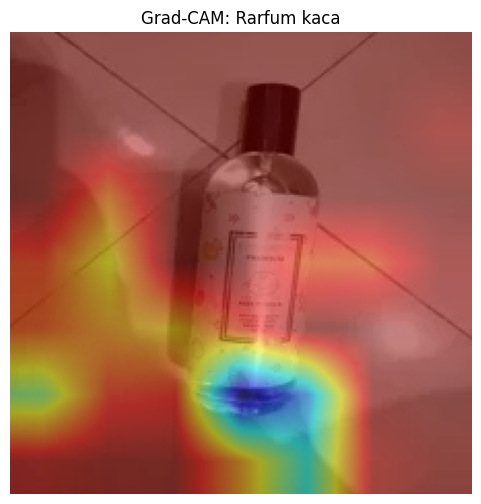

Predicted class index: 3
Predicted class name: Rarfum kaca
Output raw logits: tensor([[-0.0880, -0.3502, -0.3809, -0.0564]], grad_fn=<AddmmBackward0>)


In [34]:
# === Upload Gambar ===
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file yang diupload otomatis

# === Import Library ===
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Setup Device ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load Model MobileNetV2 ===
weights = MobileNet_V2_Weights.DEFAULT
model = mobilenet_v2(weights=weights)
num_classes = 4  # Ganti sesuai jumlah kelas
model.classifier[1] = nn.Linear(model.last_channel, num_classes)
model = model.to(device)
model.eval()

# === Class Names ===
class_names = ['Parfum botol plastik', 'Parfum roll', 'Parfum spray  logam', 'Rarfum kaca']

# === Preprocessing Gambar ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
img = Image.open(img_path).convert('RGB')
input_tensor = transform(img).unsqueeze(0).to(device)

# === Grad-CAM ===
def grad_cam(model, image_tensor, target_class):
    model.eval()
    gradients, activations = [], []

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    def forward_hook(module, input, output):
        activations.append(output)

    final_conv = model.features[-1]
    f_handle = final_conv.register_forward_hook(forward_hook)
    b_handle = final_conv.register_full_backward_hook(backward_hook)

    output = model(image_tensor)
    model.zero_grad()
    class_loss = output[0][target_class]
    class_loss.backward()

    grads = gradients[0].detach().cpu().numpy()[0]
    acts = activations[0].detach().cpu().numpy()[0]
    weights = np.mean(grads, axis=(1, 2))

    cam = np.zeros(acts.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam = (cam - cam.min()) / (cam.max() + 1e-8)

    f_handle.remove()
    b_handle.remove()
    return cam

# === Prediksi dan Tampilkan Grad-CAM ===
output = model(input_tensor)
pred_class = output.argmax(1).item()
heatmap = grad_cam(model, input_tensor, pred_class)

if heatmap is not None:
    img_np = np.array(img.resize((224, 224)))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img_np, 0.5, heatmap_colored, 0.5, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(overlayed_img)
    plt.title(f"Grad-CAM: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()

    print("Predicted class index:", pred_class)
    print("Predicted class name:", class_names[pred_class])
print("Output raw logits:", output)
